<a href="https://colab.research.google.com/github/Delfi27/American-Bank-Data/blob/main/Klasifikasi%20American%20Bank%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Delfi27/American-Bank-Data/main/Bank_of_America_data.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# **1. Carilah dataset tabular untuk masalah klasifikasi pada situs kaggle.com. Dataset harus berbeda-beda untuk masing-masing mahasiswa.**

## **A. Jumlah Dataset**

In [ ]:
df.shape

(5960, 13)

Artinya kita memiliki data dengan 13 kolom dan 5960 baris

## **B. Jumlah Fitur**

In [ ]:
df.shape

(5960, 13)

Kita memiliki data dengan 13 kolom

## **C. Keterangan Fitur**

In [ ]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

**Keterangan :**

1. **BAD** = 0 = Pemohon wanprestasi dalam pelunasan pinjaman atau dengan PD tinggi; 1 = Pemohon melunasi pinjaman
2. **LOAN** = Jumlah permintaan pinjaman
3. **MORTDUE** = Jumlah yang harus dibayar pada jaminan yang ada
4. **VALUE** = Nilai properti saat ini
5. **REASON** = Alasan (DebtCon = konsolidasi hutang; HomeImp = perbaikan rumah)
6. **JOB** = Kategori pekerjaan
7. **YOJ** = Tahun di pekerjaan sekarang
8. **DEROG** = Jumlah laporan penghinaan utama
9. **DELINQ** = Jumlah jalur kredit yang menunggak
10. **CLAGE** = Usia batas kredit tertua dalam beberapa bulan
11. **NINQ** = Jumlah pertanyaan kredit baru-baru ini
12. **CLNO** = Jumlah jalur kredit 
13. **DEBTINC** = Rasio utang terhadap pendapatan




## **D. Tipe Fitur Data**

In [ ]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

## **E. Apakah data sudah dibagi menjadi data training dan testing(YA/TIDAK) kalau IYA tuliskan  jumlah data training dan testingnya**

TIDAK

# **2. Berdasarkan dataset yang sudah Anda peroleh dari soal No. 1. Masalah bisnis apa yang  mungkin diselesaikan menggunakan data tersebut?**

masalah bisnis yang mungkin dapat diselesaikan dengan data tersebut tentang menerapkan manajemen keuangan seperti pengelolaan stok, arus kas, piutang dan utang, pendapatan dan pengeluaran.

# **3. Lakukan Eksploratory Data Analysis untuk menemukan 5 insight penting pada data yang Anda  peroleh. Sajikan hal tersebut melalui visualisasi data menggunakan tools visualisasi Python seperti  Matplotlib, Seaborn, dan Plotly!**


## **Insight 1**
Apakah ada hubungannya antara pekerjaan dengan rasio hutang terhadap pendapatan ?

In [ ]:
data = df.groupby('JOB')['DEBTINC'].sum().reset_index()
data

,JOB,DEBTINC
0,Mgr,20672.831018
1,Office,27086.858100
2,Other,62970.765827
3,ProfExe,33321.644322
4,Sales,2965.223998
5,Self,5050.656842


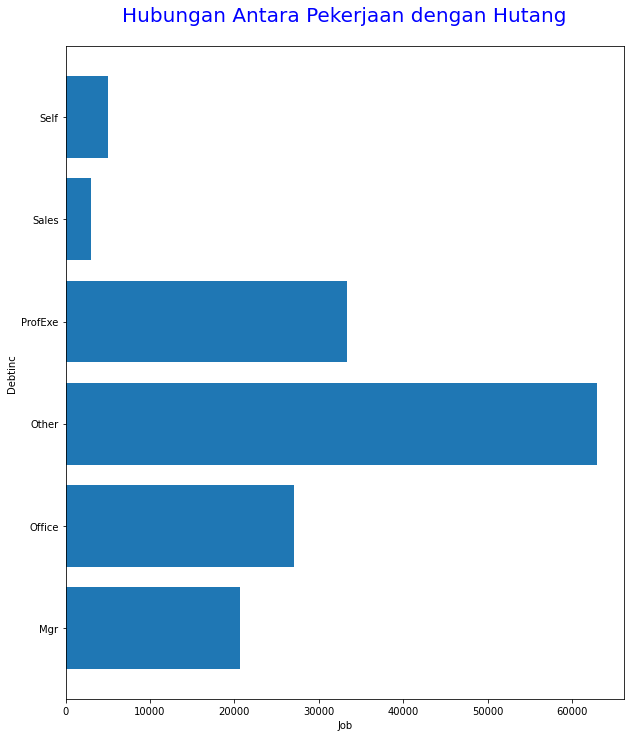

In [ ]:
# Data
pekerjaan = np.array(data.JOB)
hutang = np.array(data.DEBTINC)

# Menentukan spesifikasi figure dan axed
fig, ax = plt.subplots(1,1,figsize=(10,12))
 
# Horizontal Bar Plot
ax.barh(pekerjaan, hutang)
 
# Melabeli sumbu x
ax.set_xlabel('Job')
 
# Melabeli sumbu y
ax.set_ylabel('Debtinc')
 
# Memberi nama gambar
ax.set_title('Hubungan Antara Pekerjaan dengan Hutang', loc='center', pad=25, fontsize=20, color='blue')
 
# Menampilkan Visualisasi
plt.show()

Berdasarkan grafik tersebut, variabel pekerjaan tidak berpengaruh terhadap rasio hutang yang logis karena nasabah ingin mendapatkan pinjaman yang dapat dikembalikan.

## **Insight 2**
Nasabah mana yang memiliki nilai rata-rata permintaan pinjaman terbesar ?

In [ ]:
data1 = df.groupby('JOB')['LOAN'].sum().reset_index()
data1.nlargest(4, 'LOAN')

,JOB,LOAN
2,Other,43131300
3,ProfExe,24222900
1,Office,17199200
0,Mgr,14692100


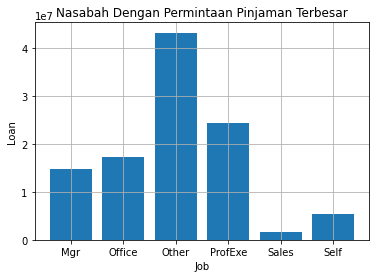

In [ ]:
plt.bar(data1.JOB, data1.LOAN)
plt.grid()

plt.xlabel('Job')
plt.ylabel('Loan')
plt.title('Nasabah Dengan Permintaan Pinjaman Terbesar')

plt.show()

Menurut plot di atas, orang yang sendiri adalah yang terkaya dari pekerjaan yang tersedia, mungkin karena mereka biasanya memiliki bisnis maupun pekerjaan yang lainnya.

## **Insight 3**
Apa alasan dari mereka (orang-orang) banyak mengambil pinjaman ?

In [ ]:
data3 = df.groupby('REASON')['LOAN'].sum().reset_index()
data3

,REASON,LOAN
0,DebtCon,78375200
1,HomeImp,28491800


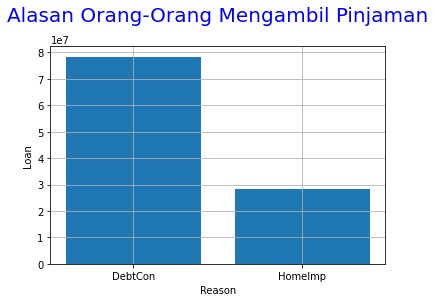

In [ ]:
plt.bar(data3.REASON, data3.LOAN)
plt.grid()

plt.xlabel('Reason')
plt.ylabel('Loan')
plt.title('Alasan Orang-Orang Mengambil Pinjaman', loc='center', pad=25, fontsize=20, color='blue')

plt.show()

Dari hasil diatas menunjukkan bahwa orang-orang mengambil nilai pinjaman yang lebih tinggi untuk konsolidasi utang daripada untuk alasan Perbaikan Rumah

## **Insight 4**
Apakah jumlah pekerjaan bervariasi sesuai dengan alasan pinjaman?

Text(0.5, 1.0, 'Jumlah Pekerjaan Terhadap Alasan Pinjaman')

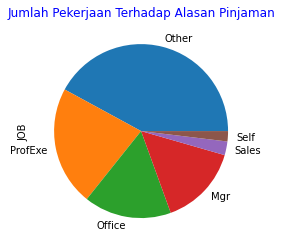

In [ ]:
df[df["REASON"] == "DebtCon"]["JOB"].value_counts(normalize=True).plot(kind='pie');
plt.title('Jumlah Pekerjaan Terhadap Alasan Pinjaman', loc='center', color='blue')

Text(0.5, 1.0, 'Jumlah Pekerjaan Terhadap Alasan Pinjaman')

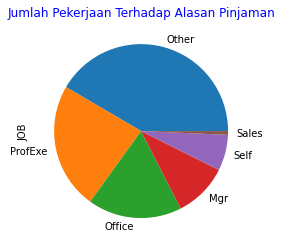

In [ ]:
df[df["REASON"] == "HomeImp"]["JOB"].value_counts(normalize=True).plot(kind='pie');
plt.title('Jumlah Pekerjaan Terhadap Alasan Pinjaman', loc='center', color='blue')

Tidak, proporsinya hampir sama, jadi jumlah pekerjaan tidak berubah karena alasan pinjaman.

## **Insight 5**

Kategori pekerjaan manakah yang jumlah jalur kredit tunggaknya paling sedikit?

In [ ]:
data4 = df.groupby('JOB')['DELINQ'].sum().reset_index()
data4

,JOB,DELINQ
0,Mgr,439.0
1,Office,397.0
2,Other,906.0
3,ProfExe,510.0
4,Sales,30.0
5,Self,103.0


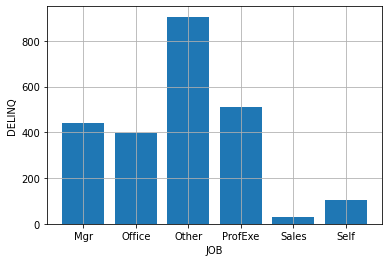

In [ ]:
plt.bar(data4.JOB, data4.DELINQ)
plt.grid()

plt.xlabel('JOB')
plt.ylabel('DELINQ')
plt.show()

Dari hasil plot diatas menunjukkan bahwa kategori pekerjaan sales memiliki jalur kredit yang menunggak paling sedikit daripada kategori pekerjaan yang lain.

# **4. Lakukan Data Preprocesing pada data yang Anda peroleh sebagai berikut:** 


## **A. Lakukan standarisasi nama kolom, yaitu menggunakan huruf kecil dan spasi diganti dengan  garis bawah. Contoh: Kolom 1 menjadi kolom_1** 


In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


Standarisasi nama kolom

In [ ]:
df.rename(columns={'BAD':'bad'}, inplace=True)
df.rename(columns={'LOAN':'loan'}, inplace=True)
df.rename(columns={'MORTDUE':'mortdue'}, inplace=True)
df.rename(columns={'VALUE':'value'}, inplace=True)
df.rename(columns={'REASON':'reason'}, inplace=True)
df.rename(columns={'JOB':'job'}, inplace=True)
df.rename(columns={'YOJ':'yoj'}, inplace=True)
df.rename(columns={'DEROG':'derog'}, inplace=True)
df.rename(columns={'DELINQ':'delinq'}, inplace=True)
df.rename(columns={'CLAGE':'clage'}, inplace=True)
df.rename(columns={'NINQ':'ninq'}, inplace=True)
df.rename(columns={'CLNO':'clno'}, inplace=True)
df.rename(columns={'DEBTINC':'debtinc'}, inplace=True)
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


## **B. Adakah data kosong pada data yang Anda miliki?, jika ada lakukan pengisian data kosong,  tuliskan alasan anda mengapa Anda memilih sebuah cara tertentu untuk mengisi data kosong  tersebut!**

Iya ada

In [ ]:
# mengecek mising value
df.isnull().sum()

bad           0
loan          0
mortdue     518
value       112
reason      252
job         279
yoj         515
derog       708
delinq      580
clage       308
ninq        510
clno        222
debtinc    1267
dtype: int64

Mengisi NaN pada kolom reason dan job dengan salah satu nama reason dan job tertentu, mengisi NaN pada kolom mortdue, value, yoj, derog, delinq, clage, ninq, clno, dan debtinc dengan nilai rata-ratanya (mean).

In [ ]:
df['mortdue']=df['mortdue'].fillna(df['mortdue'].mean())
df['value']=df['value'].fillna(df['value'].mean())
df['reason']=df['reason'].replace(np.nan, "DebtCon")
df['job']=df['job'].replace(np.nan, "Other")
df['yoj']=df['yoj'].fillna(df['yoj'].mean())
df['derog']=df['derog'].fillna(df['derog'].mean())
df['delinq']=df['delinq'].fillna(df['delinq'].mean())
df['clage']=df['clage'].fillna(df['clage'].mean())
df['ninq']=df['ninq'].fillna(df['ninq'].mean())
df['clno']=df['clno'].fillna(df['clno'].mean())
df['debtinc']=df['debtinc'].fillna(df['debtinc'].mean())
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [ ]:
# mengecek mising value
df.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

alasan menggunakan cara untuk mengisi nilai Nan dengan nilai tertentu dan mean (rata-rata) yaitu menghitung mean, median atau modus adalah metode imputasi yang paling sederhana, karena fungsi yang diuji tidak mengambil keuntungan dari karakteristik time series atau hubungan antar variabel dan lebih cepat. walaupun menggunakan cara ini memiliki kelemahan, salah satu kelemahannya adalah imputasi berarti mengurangi varians dalam dataset.

## **C. Adakah outlier pada data yang Anda miliki? Jika ada lakukan penghapusan outlier!** 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


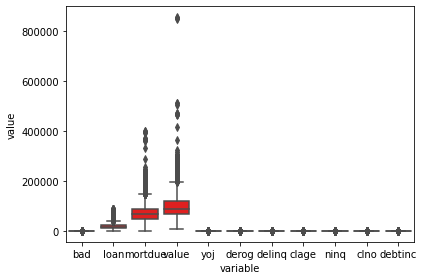

In [ ]:
# mengecek outlier
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='red',orient='v', data=pd.melt(df1))
plt.tight_layout()

semua kolom memiliki outlier

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

In [ ]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

bad            0.000000
loan       12200.000000
mortdue    40061.250000
value      52515.250000
yoj            9.000000
derog          0.000000
delinq         0.449442
clage        109.771628
ninq           2.000000
clno          11.000000
debtinc        7.186733
dtype: float64


In [ ]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
4,0,1700,97800.0,112000.0,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.0,14.0,33.779915
13,0,2000,64536.0,87400.0,DebtCon,Mgr,2.500000,0.0,0.0,147.133333,0.0,24.0,33.779915
19,0,2300,102370.0,120953.0,HomeImp,Office,2.000000,0.0,0.0,90.992533,0.0,13.0,31.588503
26,0,2400,98449.0,117195.0,HomeImp,Office,4.000000,0.0,0.0,93.811775,0.0,13.0,29.681827
29,0,2500,7229.0,44516.0,HomeImp,Self,8.922268,0.0,0.0,208.000000,0.0,12.0,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,0,40500,66895.0,113770.0,DebtCon,Mgr,14.000000,0.0,0.0,188.140417,0.0,22.0,38.085328
5679,0,40600,14534.0,60000.0,DebtCon,Other,20.000000,0.0,0.0,206.966667,1.0,31.0,33.779915
5685,0,40900,18760.0,69373.0,DebtCon,Other,19.000000,0.0,0.0,211.698820,1.0,31.0,39.922587
5689,0,40900,64674.0,111877.0,DebtCon,Mgr,15.000000,0.0,0.0,201.736373,0.0,21.0,40.456010


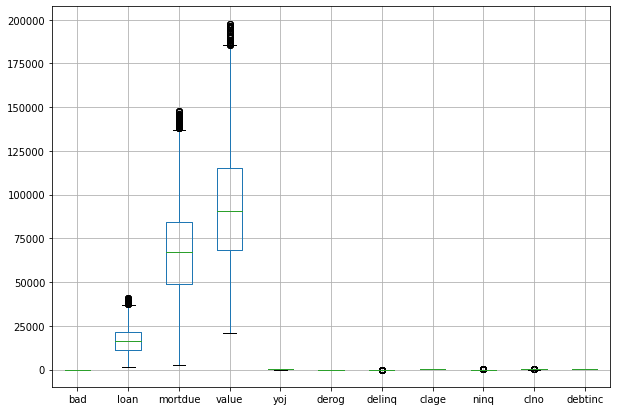

In [ ]:
#Melihat Outlier
df_clear.boxplot(figsize=(10,7));

Outlier berhasil dihapus

## **D. Lakukan plot histogram distribusi pada setiap fitur pada data Anda. Jika terindikasi bukan  berdistribusi normal. Lakukan normalisasi pada fitur tersebut!**

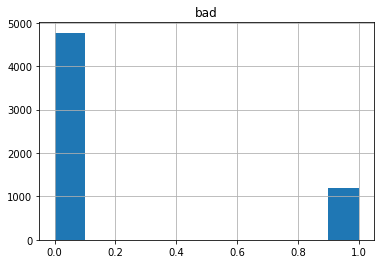

In [ ]:
df[["bad"]].hist();

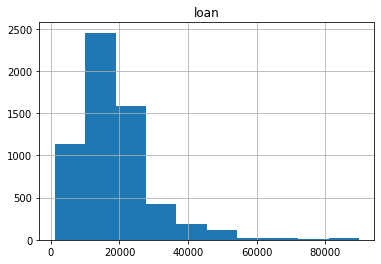

In [ ]:
df[["loan"]].hist();

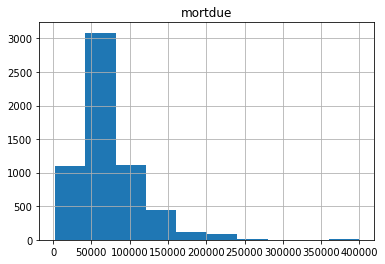

In [ ]:
df[["mortdue"]].hist();

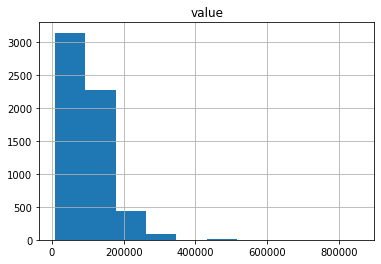

In [ ]:
df[["value"]].hist();

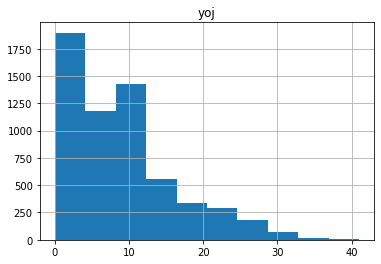

In [ ]:
df[["yoj"]].hist();

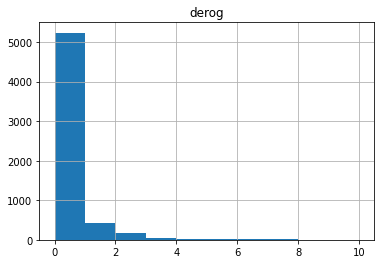

In [ ]:
df[["derog"]].hist();

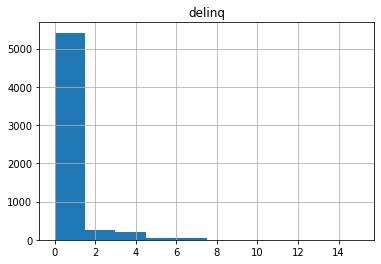

In [ ]:
df[["delinq"]].hist();

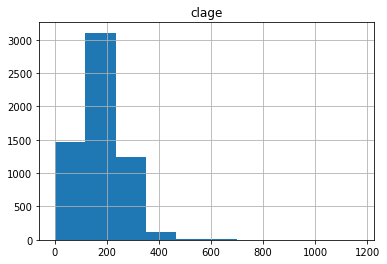

In [ ]:
df[["clage"]].hist();

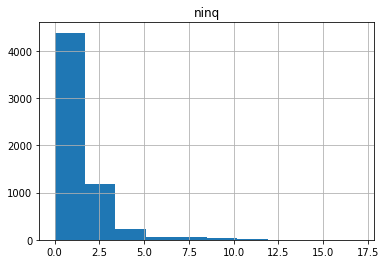

In [ ]:
df[["ninq"]].hist();

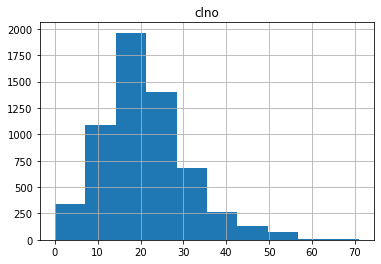

In [ ]:
df[["clno"]].hist();

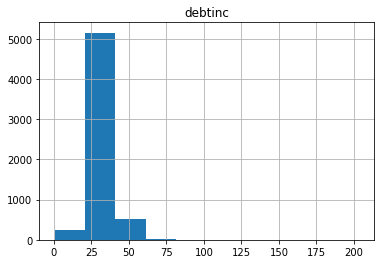

In [ ]:
df[["debtinc"]].hist();

In [ ]:
del df_clear['reason']

In [ ]:
del df_clear['job']

In [ ]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0.0,0.000000,0.656072,0.515755,0.120000,0.0,0.0,0.201865,0.0,0.333333,0.537837
1,0.0,0.007614,0.426787,0.376789,0.100000,0.0,0.0,0.351509,0.0,0.571429,0.537837
2,0.0,0.015228,0.687573,0.566331,0.080000,0.0,0.0,0.195354,0.0,0.309524,0.451934
3,0.0,0.017766,0.660546,0.545102,0.160000,0.0,0.0,0.203195,0.0,0.309524,0.377193
4,0.0,0.020305,0.031776,0.134537,0.356891,0.0,0.0,0.520809,0.0,0.285714,0.537837
...,...,...,...,...,...,...,...,...,...,...,...
2812,0.0,0.984772,0.443047,0.525754,0.560000,0.0,0.0,0.465570,0.0,0.523810,0.706608
2813,0.0,0.987310,0.082129,0.222006,0.800000,0.0,0.0,0.517935,0.2,0.738095,0.537837
2814,0.0,0.994924,0.111258,0.274955,0.760000,0.0,0.0,0.531098,0.2,0.738095,0.778629
2815,0.0,0.994924,0.427738,0.515060,0.600000,0.0,0.0,0.503387,0.0,0.500000,0.799539


## **E. Jika data anda belum dibagi menjadi data training & testing, lakukan pembagian data training dan testing dengan perbandingan 80:20!**

In [ ]:
# Membagi menjadi training set dan test set

from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df['debtinc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test

(      bad   loan   mortdue     value  ... delinq       clage  ninq  clno
 5310    0  29700  100657.0  148653.0  ...    0.0  221.925311   0.0  40.0
 2028    0  13000   39386.0   53149.0  ...    0.0  110.477957   1.0  16.0
 3324    0  17700  111612.0  128416.0  ...    0.0  169.733488   0.0  17.0
 2246    0  13800   73688.0   94071.0  ...    0.0  221.223143   2.0  28.0
 4711    1  24900   62191.0   83694.0  ...    0.0   55.937512   0.0  14.0
 ...   ...    ...       ...       ...  ...    ...         ...   ...   ...
 965     0   9300   30204.0   57036.0  ...    0.0  235.492813   0.0  19.0
 5366    0  30600   78355.0  124426.0  ...    0.0   81.223398   1.0  34.0
 4087    0  21400   96016.0  135783.0  ...    0.0  169.016138   2.0  25.0
 4679    0  24600  135278.0  164559.0  ...    0.0  225.366848   0.0  20.0
 4104    0  21400  128095.0  167824.0  ...    0.0  180.417354   0.0  38.0
 
 [4768 rows x 12 columns],
       bad   loan   mortdue     value  ...    delinq       clage      ninq  clno
 1

**Data Training & Testing diperoleh:**

- X_train = 4768 rows x 12 columns
- X_test = 1192 rows x 12 columns
- y_train = Name: debtinc, Length: 4768, dtype: float64
- y_test = Name: debtinc, Length: 1192, dtype: float64 